In [139]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [140]:
Bank_Data=pd.read_csv("Bank_Personal_Loan_Modelling.csv") # Read the File

# Exploratory Data Analysis 

In [141]:
Bank_Data.head() #Top 5 rows

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [142]:
#Renaming the column to avoid the space in the column Name
Bank_Data.rename(columns={'Personal Loan': 'PersonalLoan', 'Securities Account': 'SecuritiesAccount','CD Account': 'CDAccount','ZIP Code':'ZIPCode'}, inplace=True)

In [143]:
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The data has 5000 records with 14 attributes. All are of integer type excpet the CCAvg column.
Our Target Variable is Personal Loan
ID Attribute will be a one to one mapping and has no influence on the prediction hence can be dropped.

In [144]:
Bank_Data.isna().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

There are no Null values in the given data.

# Analysis of Category Data with Target Variable

In [145]:
Bank_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [146]:
Bank_Data.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


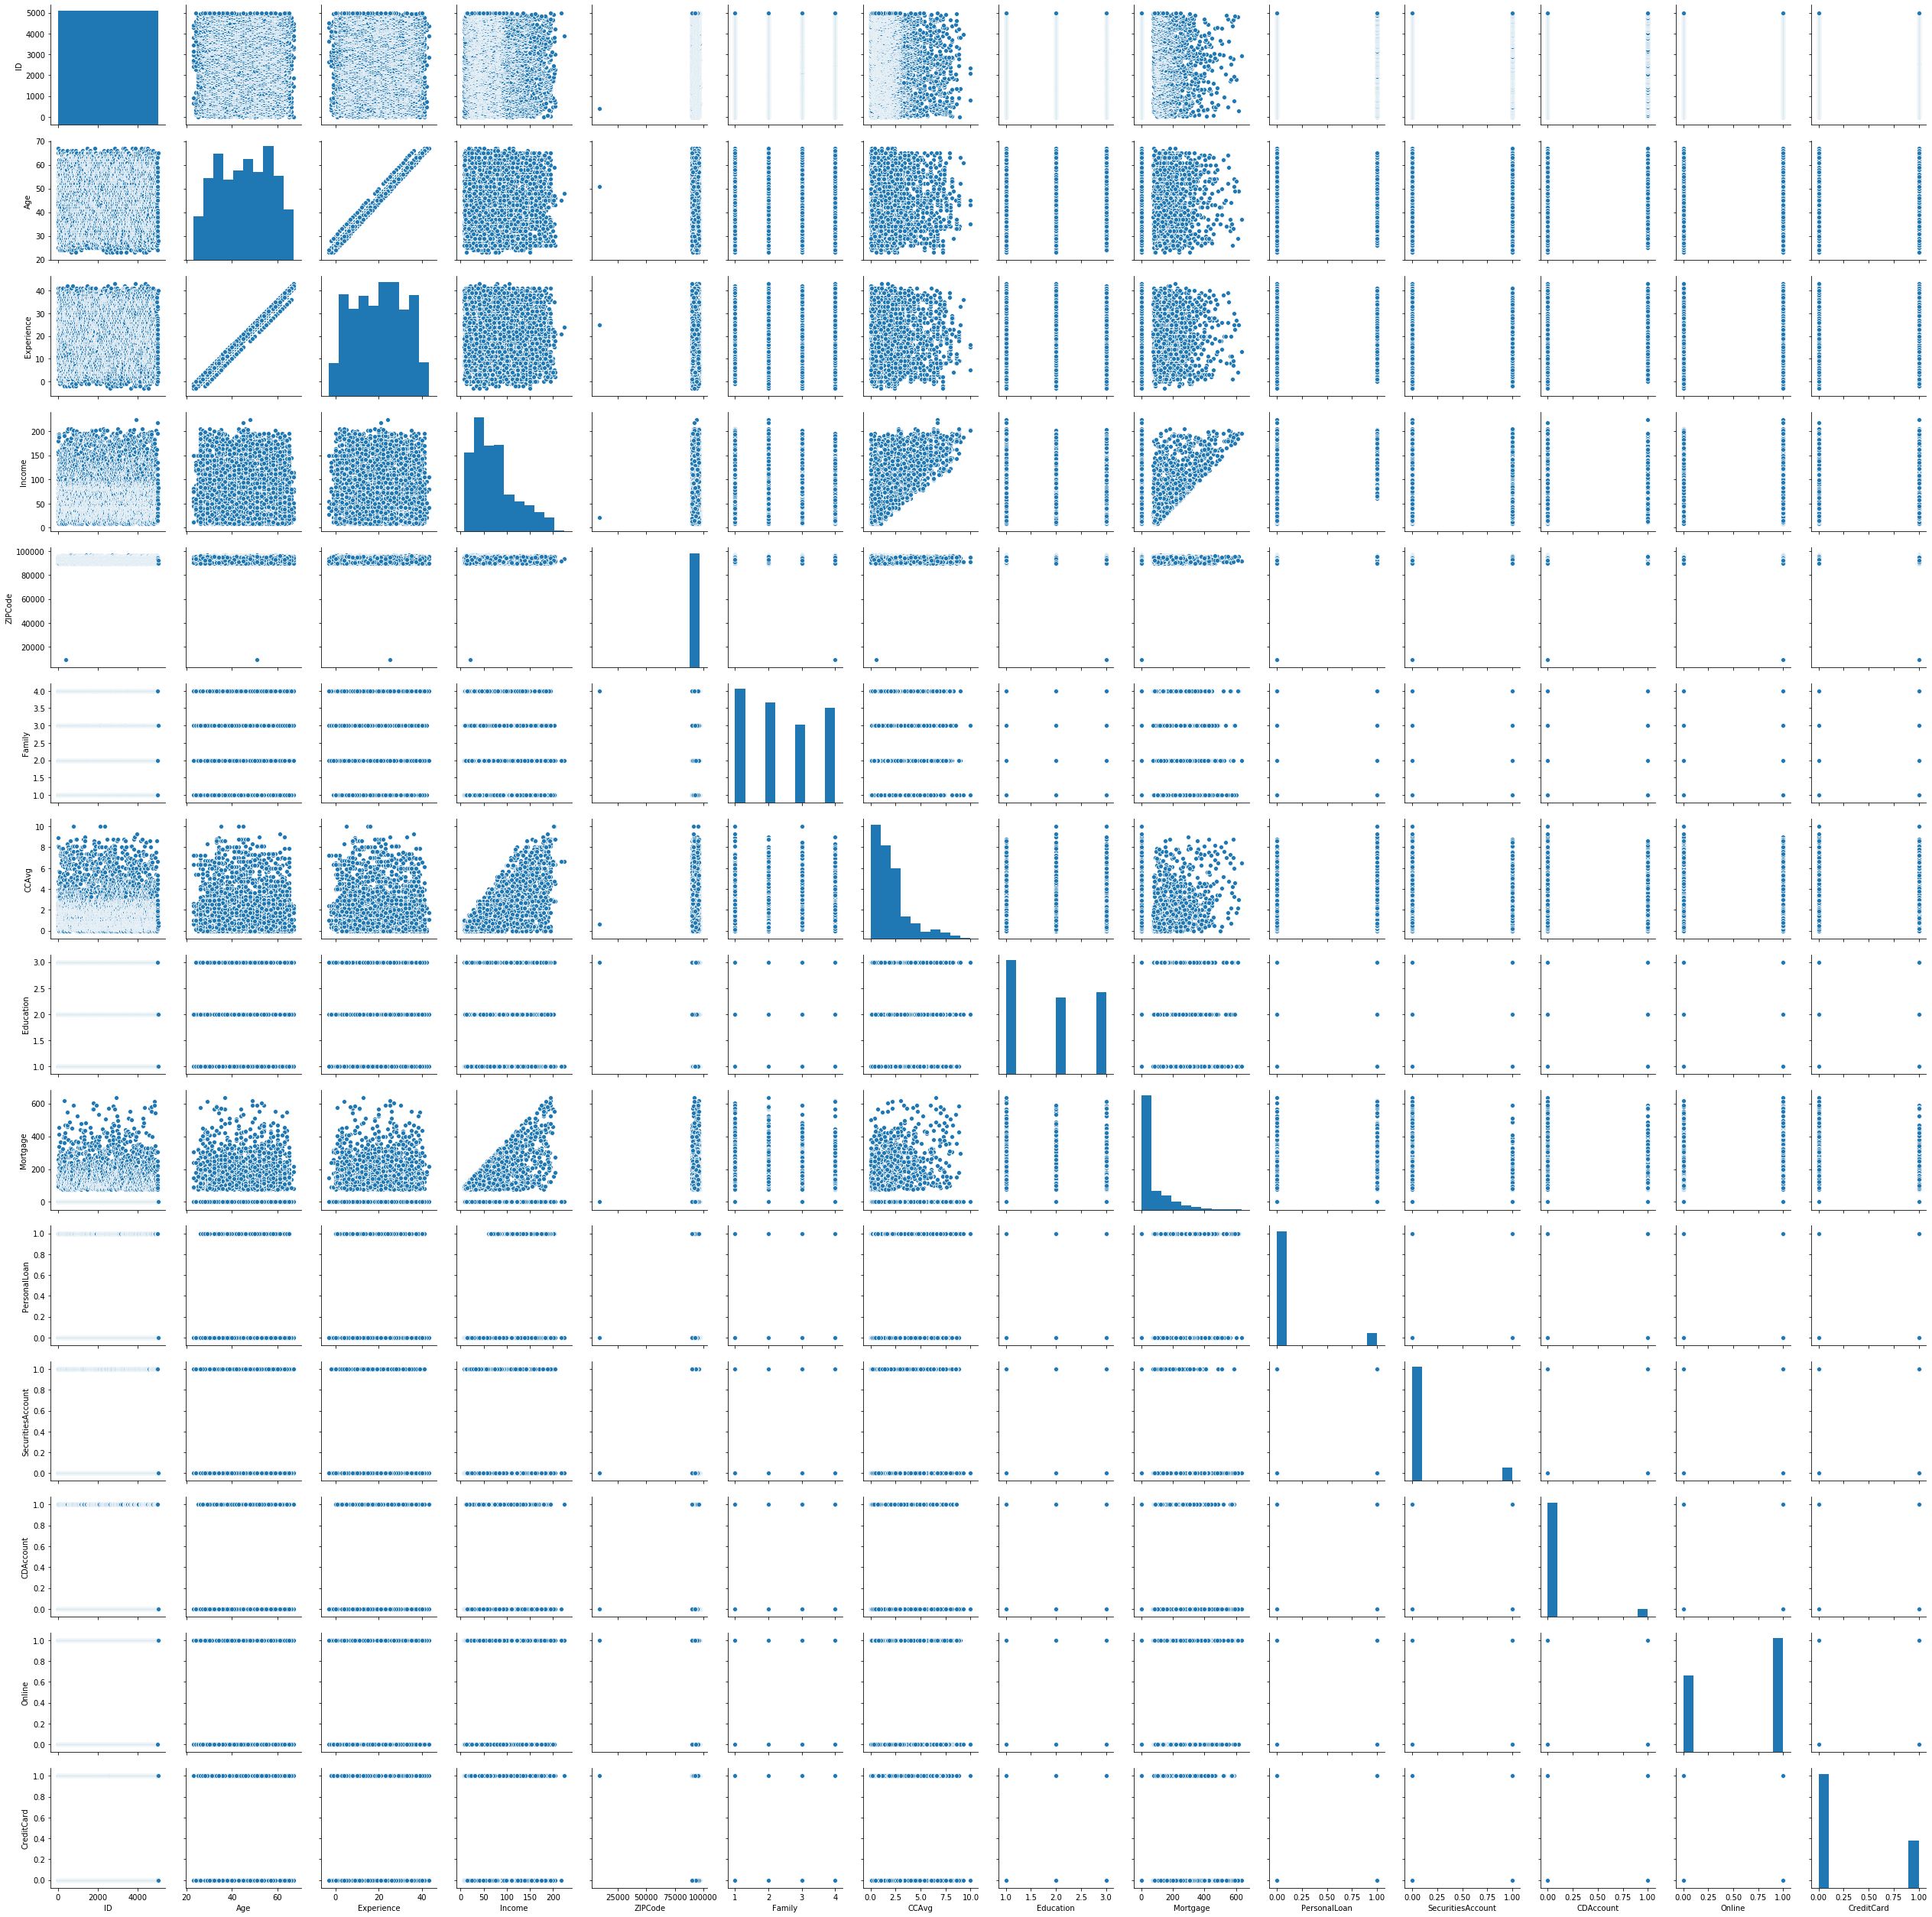

In [147]:
sns.pairplot(Bank_Data)
plt.show()

Age and Experience are highly corelated. 
Income is corealted with CC Avg,Mortgage , PersonalLoan & CDAccount.

In [148]:
print(Bank_Data['PersonalLoan'].value_counts())

print(Bank_Data['SecuritiesAccount'].value_counts())

print(Bank_Data['CDAccount'].value_counts())

print(Bank_Data['Online'].value_counts())

print(Bank_Data['CreditCard'].value_counts())

0    4520
1     480
Name: PersonalLoan, dtype: int64
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
0    4698
1     302
Name: CDAccount, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64


Percentage of people availed Personal Loan : 9.6

Percentage of people availed Securities Account : 10.44

Percentage of people availed Securities Account : 6.04

Percentage of people availed Online Account : 59.68

Percentage of people availed Credit Card : 29.4

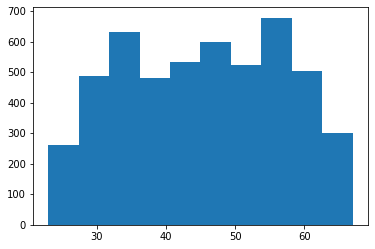

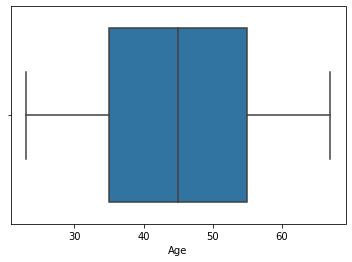

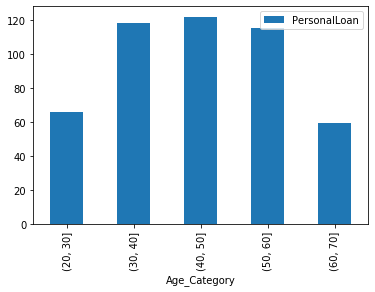

In [149]:
#Age
Analysis_Bank_Data=Bank_Data[Bank_Data['PersonalLoan']==1].copy()
Analysis_Bank_Data['Age_Category']=pd.cut(x=Analysis_Bank_Data['Age'], bins=[20, 30, 40, 50, 60, 70])
plt.hist(Bank_Data['Age'])
plt.show()
sns.boxplot(Bank_Data['Age'])
plt.show()
pd.pivot_table(Analysis_Bank_Data, index='Age_Category',values='PersonalLoan', aggfunc='count').plot(kind='bar')
plt.show()

Data has wide spread of the Age with minimum value of 23 and maximum value of 67. 
There are no outliners in the Age Data
As per the data number of people who have availed the loan is more within the age range of 30 to 60. 

-1    33
-2    15
-3     4
Name: Experience, dtype: int64


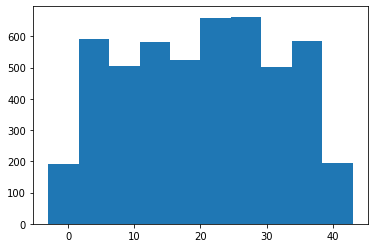

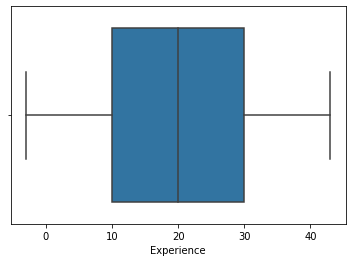

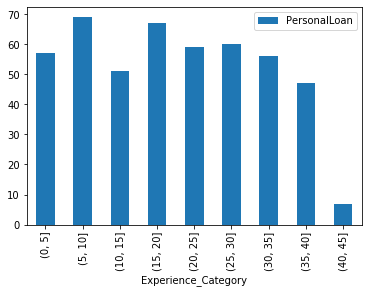

In [150]:
#Experience
print(Bank_Data[Bank_Data['Experience']<0].Experience.value_counts())
Analysis_Bank_Data['Experience_Category']=pd.cut(x=Analysis_Bank_Data['Experience'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
plt.hist(Bank_Data['Experience'])
plt.show()
sns.boxplot(Bank_Data['Experience'])
plt.show()
pd.pivot_table(Analysis_Bank_Data, index='Experience_Category',values='PersonalLoan', aggfunc='count').plot(kind='bar')
plt.show()

Data has wide spread of the Experiece with minimum value of -3 and maximum value of 43. 
There are 52 records which are having negative value in the experience these are the error in the data and can be skipped
There are no outliners in the Experiece Data
As per the data number of people who have availed the loan is more within the age range of 30 to 60. 

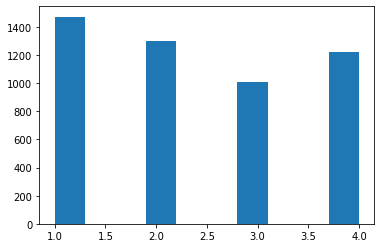

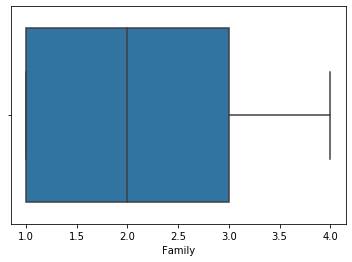

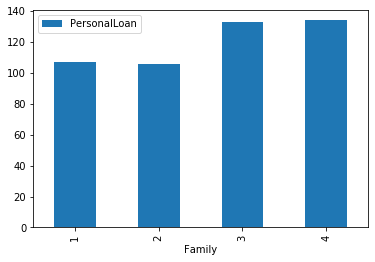

In [151]:
#Family
plt.hist(Bank_Data['Family'])
plt.show()
sns.boxplot(Bank_Data['Family'])
plt.show()
pd.pivot_table(Analysis_Bank_Data, index='Family',values='PersonalLoan', aggfunc='count').plot(kind='bar')
plt.show()

Family size varies from 1 to 4.
There are no outliners in the Family Data
As per the data number of people who have availed the loan is more for the family with size 3 & 4. 

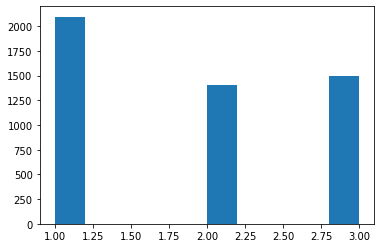

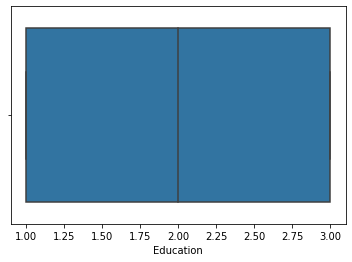

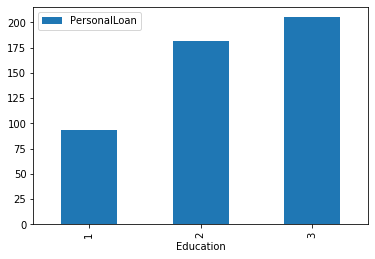

In [152]:
#Education
plt.hist(Bank_Data['Education'])
plt.show()
sns.boxplot(Bank_Data['Education'])
plt.show()
pd.pivot_table(Analysis_Bank_Data, index='Education',values='PersonalLoan', aggfunc='count').plot(kind='bar')
plt.show()

There are three type of values for Education i.e 1,3 & 3.
There are no outliners in the Education Data
Number of people who have availed the loan increases as the Education increases. 

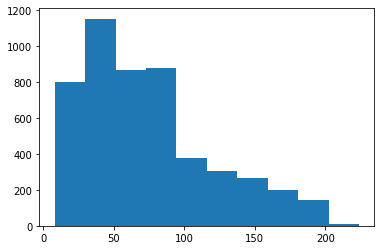

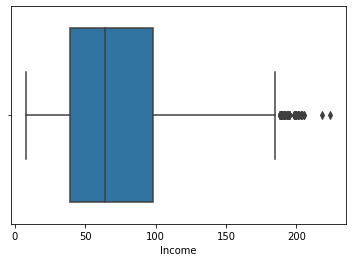

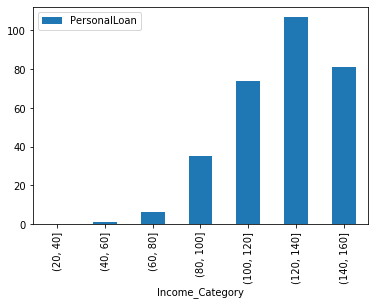

In [153]:
#Income
Analysis_Bank_Data['Income_Category']=pd.cut(x=Analysis_Bank_Data['Income'], bins=[20,40,60,80,100,120,140,160])
plt.hist(Bank_Data['Income'])
plt.show()
sns.boxplot(Bank_Data['Income'])
plt.show()
pd.pivot_table(Analysis_Bank_Data, index='Income_Category',values='PersonalLoan', aggfunc='count').plot(kind='bar')
plt.show()

Income data is left skewed hence there are few outliners in the Income Data. 
As per the data people having less income are has less probability of availing the loan . 

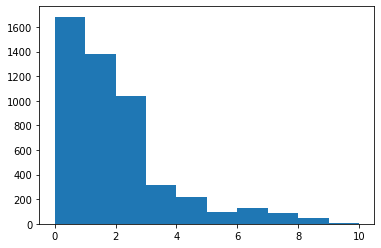

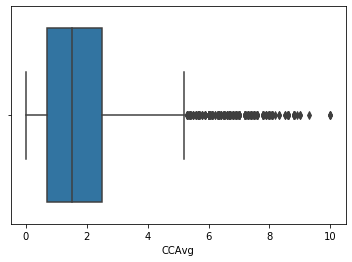

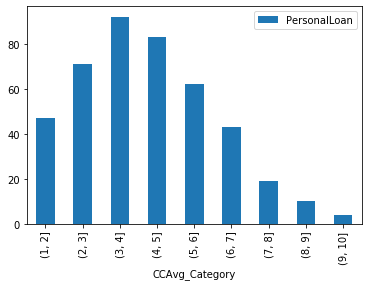

In [154]:
#CCAvg
Analysis_Bank_Data['CCAvg_Category']=pd.cut(x=Analysis_Bank_Data['CCAvg'], bins=[1,2,3,4,5,6,7,8,9,10])
plt.hist(Bank_Data['CCAvg'])
plt.show()
sns.boxplot(Bank_Data['CCAvg'])
plt.show()
pd.pivot_table(Analysis_Bank_Data, index='CCAvg_Category',values='PersonalLoan', aggfunc='count').plot(kind='bar')
plt.show()

CCAvg data is left skewed hence there are few outliners. 
As per the data probability of people availing Personal Loan is more for the CC Avg between 3 to 4 and it decreases for the higher CC Avg.

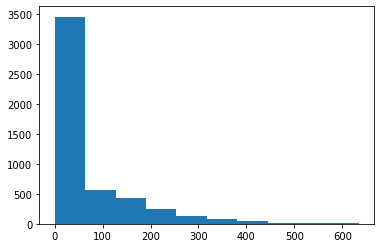

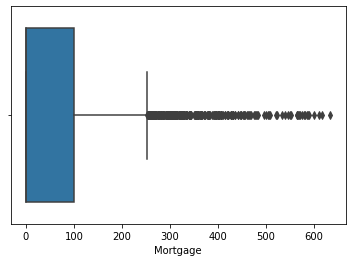

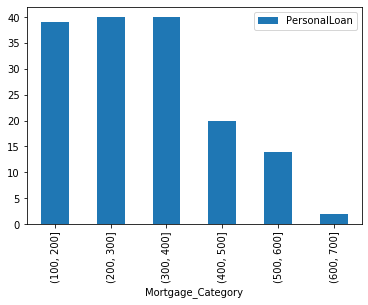

In [155]:
#Mortgage
Analysis_Bank_Data['Mortgage_Category']=pd.cut(x=Analysis_Bank_Data['Mortgage'], bins=[100,200,300,400,500,600,700])
plt.hist(Bank_Data['Mortgage'])
plt.show()
sns.boxplot(Bank_Data['Mortgage'])
plt.show()
pd.pivot_table(Analysis_Bank_Data, index='Mortgage_Category',values='PersonalLoan', aggfunc='count').plot(kind='bar')
plt.show()

Mortgage data is left skewed hence there are few outliners. 
As per the data probability of people availing Personal Loan is more for the Mortgage between 100 to 400 and it decreases for the higher Mortgage.

In [156]:
#Securities Account
pd.pivot_table(Analysis_Bank_Data, index='SecuritiesAccount',values='PersonalLoan', aggfunc='count')

,PersonalLoan
SecuritiesAccount,
0,420
1,60


Probability of people having Securities Account and availing the loan is less compared to people who donot have Securities Account in the bank.

In [157]:
#CD Account
pd.pivot_table(Analysis_Bank_Data, index='CDAccount',values='PersonalLoan', aggfunc='count')

,PersonalLoan
CDAccount,
0,340
1,140


Probability of people having certificate of deposit account with the bank and availing the loan is less compared to people who donot have certificate of deposit account with the bank.

In [158]:
#Online
pd.pivot_table(Analysis_Bank_Data, index='Online',values='PersonalLoan', aggfunc='count')

,PersonalLoan
Online,
0,189
1,291


People who are using internet banking facilities with the bank has more probability of taking Personal Loan.

In [159]:
#CreditCard
pd.pivot_table(Analysis_Bank_Data, index='CreditCard',values='PersonalLoan', aggfunc='count')

,PersonalLoan
CreditCard,
0,337
1,143


People who are using the Credit card has les probability of taking Personal Loan.

# Preparing the data to train a model

In [160]:
Bank_Data.drop(columns =["ID"], axis = 1,inplace = True)

In [161]:
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [162]:
Bank_Data.drop( Bank_Data[ Bank_Data['Experience'] < 0 ].index , inplace=True)#Dropping the negative experience data which is noise

# Logistic Regression

Iteration 1:

Split the Data

In [163]:
X_It1 = Bank_Data.drop('PersonalLoan',axis=1)     # Predictor feature columns (8 X m)
Y_It1 = Bank_Data['PersonalLoan']   # Predicted class (1=True, 0=False) (1 X m)
X_It1_train, X_It1_test, y_It1_train, y_It1_test = train_test_split(X_It1, Y_It1, test_size=0.3, random_state=1)

In [164]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(Bank_Data.loc[Bank_Data['PersonalLoan'] == 1]), (len(Bank_Data.loc[Bank_Data['PersonalLoan'] == 1])/len(Bank_Data.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(Bank_Data.loc[Bank_Data['PersonalLoan'] == 0]), (len(Bank_Data.loc[Bank_Data['PersonalLoan'] == 0])/len(Bank_Data.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_It1_train[y_It1_train[:] == 1]), (len(y_It1_train[y_It1_train[:] == 1])/len(y_It1_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_It1_train[y_It1_train[:] == 0]), (len(y_It1_train[y_It1_train[:] == 0])/len(y_It1_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_It1_test[y_It1_test[:] == 1]), (len(y_It1_test[y_It1_test[:] == 1])/len(y_It1_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_It1_test[y_It1_test[:] == 0]), (len(y_It1_test[y_It1_test[:] == 0])/len(y_It1_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.70%)
Original Personal Loan False Values   : 4468 (90.30%)

Training Personal Loan True Values    : 335 (9.67%)
Training Personal Loan False Values   : 3128 (90.33%)

Test Personal Loan True Values        : 145 (9.76%)
Test Personal Loan False Values       : 1340 (90.24%)



In [165]:
model_It1 = LogisticRegression(solver="liblinear")
model_It1.fit(X_It1_train, y_It1_train)
y_It1_predict = model_It1.predict(X_It1_test)
coef_df_It1 = pd.DataFrame(model_It1.coef_)
coef_df_It1['intercept'] = model_It1.intercept_
print(coef_df_It1)

          0        1        2         3        4         5         6  \
0  0.007275  0.00534  0.03701 -0.000072  0.01465  0.007419  0.016314   

          7         8         9        10        11  intercept  
0  0.000781  0.000989  0.004266 -0.000511 -0.000558  -0.000105  


According to the above the equation for the prediction of clasification is :
y= 1/e-((-0.000105)+(-0.007275*Age)+(0.00534*Experience)+(0.03701*Income)+(-0.000072*ZIPCode)+(0.01465*Family)+(0.007419*CCAvg)+(0.016314*Education)+(0.000781*Mortgage)+(0.000989*SecuritiesAccount)+(0.004266*CDAccount)+(-0.000511*Online)+(-0.000558*CreditCard)

In [166]:
# Fit the model on train
logit_It1 = sm.Logit( y_It1_train, sm.add_constant( X_It1_train ) )
lg_It1 = logit_It1.fit()
lg_It1.summary2()

Optimization terminated successfully.
         Current function value: 0.129609
         Iterations 9


C:\Users\Hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit            Pseudo R-squared: 0.592      
Dependent Variable:  PersonalLoan     AIC:              923.6754   
Date:                2020-04-10 22:04 BIC:              1003.6240  
No. Observations:    3463             Log-Likelihood:   -448.84    
Df Model:            12               LL-Null:          -1100.7    
Df Residuals:        3450             LLR p-value:      7.6413e-272
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                   Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------
const             -12.0982   5.0225 -2.4088 0.0160 -21.9422 -2.2542
Age                -0.0685   0.0745 -0.9186 0.3583  -0.2146  0.0776
Experience          0.0776   0.0743  1.0434 0.2968  -0.0681  0.2232
Income              0.0538   0.0031 17.0911 0.0000   0.0477  0.0600
ZIPCode             0.0000   0.0000  0.1294 0.8970  -0.0001  0.0001
Family              0.6753   0.0889  7.5940 0.0000   0.5010  0.8496
CCAvg               0.1208   0.0478  2.5249 0.0116   0.0270  0.2145
Education           1.6712   0.1368 12.2207 0.0000   1.4032  1.9393
Mortgage            0.0009   0.0007  1.4122 0.1579  -0.0004  0.0022
SecuritiesAccount  -0.8331   0.3449 -2.4153 0.0157  -1.5092 -0.1571
CDAccount           3.9273   0.4003  9.8113 0.0000   3.1428  4.7119
Online             -0.7050   0.1871 -3.7683 0.0002  -1.0718 -0.3383
CreditCard         -1.2914   0.2498 -5.1687 0.0000  -1.7810 -0.8017
===================================================================

"""

Regression coefficent for the Zipcode & Mortgage is almost 0 .i.e. change in the Zip code keeping other attributes constant will not change the classification of Personal Loan. Hence Zipcode can be dropped from prediction.

In [181]:
y_It1_predict_train = model_It1.predict(X_It1_train)
y_It1_predict_test = model_It1.predict(X_It1_test)

accuracy_score_train_It1=metrics.accuracy_score(y_It1_train,y_It1_predict_train)
accuracy_score_test_It1=metrics.accuracy_score(y_It1_test,y_It1_predict_test)

print("Logistic Model Accuracy Score for Iteration 1: {0:.4f} \n".format(accuracy_score_train_It1*100))
print("Logistic Model Accuracy Score for Iteration 1: {0:.4f} \n".format(accuracy_score_test_It1*100))

model_score_It1 = model_It1.score(X_It1_test, y_It1_test)
print("Logistic Model Test for Iteration 1: {} \n".format(model_score_It1*100))
cm_It1=metrics.confusion_matrix(y_It1_test, y_It1_predict, labels=[1, 0])
df_cm_It1 = pd.DataFrame(cm_It1, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Iteration 1:\n\n{} ".format(df_cm_It1))

Logistic Model Accuracy Score for Iteration 1: 90.9616 

Logistic Model Accuracy Score for Iteration 1: 90.2357 

Logistic Model Test for Iteration 1: 90.23569023569024 

Confusion Matrix for Iteration 1:

          Predict 1  Predict 0
Actual 1         45        100
Actual 0         45       1295 


The confusion matrix

True Positives (TP): we correctly predicted that they avail Personal Loan 45

True Negatives (TN): we correctly predicted that they don't avail Personal Loan 1295

False Positives (FP): we incorrectly predicted that they avail Personal Loan (a "Type I error") 45 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't avail Personal Loa (a "Type II error") 100 Falsely predict negative Type II error

Iteration 2: Removing the Zip Code & Mortgage Attribute

In [168]:
Bank_Data.drop(columns =["ZIPCode","Mortgage"], axis = 1,inplace = True)

In [169]:
X_It2 = Bank_Data.drop('PersonalLoan',axis=1)     # Predictor feature columns (8 X m)
Y_It2 = Bank_Data['PersonalLoan']   # Predicted class (1=True, 0=False) (1 X m)
X_It2_train, X_It2_test, y_It2_train, y_It2_test = train_test_split(X_It2, Y_It2, test_size=0.3, random_state=1)

In [170]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(Bank_Data.loc[Bank_Data['PersonalLoan'] == 1]), (len(Bank_Data.loc[Bank_Data['PersonalLoan'] == 1])/len(Bank_Data.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(Bank_Data.loc[Bank_Data['PersonalLoan'] == 0]), (len(Bank_Data.loc[Bank_Data['PersonalLoan'] == 0])/len(Bank_Data.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_It2_train[y_It2_train[:] == 1]), (len(y_It2_train[y_It2_train[:] == 1])/len(y_It2_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_It2_train[y_It2_train[:] == 0]), (len(y_It2_train[y_It2_train[:] == 0])/len(y_It2_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_It2_test[y_It2_test[:] == 1]), (len(y_It2_test[y_It2_test[:] == 1])/len(y_It2_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_It2_test[y_It2_test[:] == 0]), (len(y_It2_test[y_It2_test[:] == 0])/len(y_It2_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.70%)
Original Personal Loan False Values   : 4468 (90.30%)

Training Personal Loan True Values    : 335 (9.67%)
Training Personal Loan False Values   : 3128 (90.33%)

Test Personal Loan True Values        : 145 (9.76%)
Test Personal Loan False Values       : 1340 (90.24%)



In [171]:
model_It2 = LogisticRegression(solver="liblinear")
model_It2.fit(X_It2_train, y_It2_train)
y_It2_predict = model_It2.predict(X_It2_test)
coef_df_It2 = pd.DataFrame(model_It2.coef_)
coef_df_It2['intercept'] = model_It2.intercept_
print(coef_df_It2)

          0         1         2        3         4         5         6  \
0 -0.396543  0.399036  0.050581  0.61793  0.104854  1.586438 -0.622064   

         7         8         9  intercept  
0  3.33915 -0.664873 -1.104744  -2.291427  


According to the above the equation for the prediction of clasification is :
y= 1/e-((-2.291427)+(-0.396543*Age)+(0.399036*Experience)+(0.050581*Income)+(0.61793*Family)+(0.104854*CCAvg)+(1.586438*Education)+(-0.622064*SecuritiesAccount)+(3.33915*CDAccount)+(-0.664873*Online)+(-1.104744*CreditCard)

In [172]:
# Fit the model on train
logit_It2 = sm.Logit( y_It2_train, sm.add_constant( X_It2_train ) )
lg_It2 = logit_It2.fit()
lg_It2.summary2()

Optimization terminated successfully.
         Current function value: 0.129897
         Iterations 9


C:\Users\Hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit            Pseudo R-squared: 0.591      
Dependent Variable:  PersonalLoan     AIC:              921.6682   
Date:                2020-04-10 22:04 BIC:              989.3170   
No. Observations:    3463             Log-Likelihood:   -449.83    
Df Model:            10               LL-Null:          -1100.7    
Df Residuals:        3452             LLR p-value:      1.5754e-273
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                   Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-------------------------------------------------------------------
const             -11.5744   1.9720 -5.8694 0.0000 -15.4394 -7.7094
Age                -0.0629   0.0743 -0.8461 0.3975  -0.2085  0.0828
Experience          0.0719   0.0741  0.9704 0.3319  -0.0733  0.2171
Income              0.0544   0.0031 17.3327 0.0000   0.0482  0.0605
Family              0.6793   0.0891  7.6238 0.0000   0.5047  0.8540
CCAvg               0.1111   0.0472  2.3521 0.0187   0.0185  0.2037
Education           1.6547   0.1357 12.1981 0.0000   1.3888  1.9206
SecuritiesAccount  -0.8421   0.3459 -2.4348 0.0149  -1.5200 -0.1642
CDAccount           3.9566   0.4005  9.8782 0.0000   3.1715  4.7416
Online             -0.7039   0.1868 -3.7677 0.0002  -1.0701 -0.3377
CreditCard         -1.3072   0.2497 -5.2347 0.0000  -1.7967 -0.8178
===================================================================

"""

In [173]:
y_It2_predict_train = model_It2.predict(X_It2_train)
y_It2_predict_test = model_It2.predict(X_It2_test)

accuracy_score_train_It2=metrics.accuracy_score(y_It2_train,y_It2_predict_train)
accuracy_score_test_It2=metrics.accuracy_score(y_It2_test,y_It2_predict_test)

print("Logistic Model Accuracy Score for Iteration 2: {0:.4f} \n".format(accuracy_score_train_It2*100))
print("Logistic Model Accuracy Score for Iteration 2: {0:.4f} \n".format(accuracy_score_test_It2*100))

model_score_It2 = model_It2.score(X_It2_test, y_It2_test)
print("Logistic Model Score for Iteration 2 : {} \n".format(model_score_It2*100))
cm_It2=metrics.confusion_matrix(y_It2_test, y_It2_predict, labels=[1, 0])
df_cm_It2 = pd.DataFrame(cm_It2, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Iteration 2: \n\n{} ".format(df_cm_It2))

Logistic Model Accuracy Score for Iteration 2: 94.9466 

Logistic Model Accuracy Score for Iteration 2: 95.0842 

Logistic Model Score for Iteration 2 : 95.08417508417509 

Confusion Matrix for Iteration 2: 

          Predict 1  Predict 0
Actual 1         91         54
Actual 0         19       1321 


# The confusion matrix

True Positives (TP): we correctly predicted that they avail Personal Loan 91

True Negatives (TN): we correctly predicted that they don't avail Personal Loan 1321

False Positives (FP): we incorrectly predicted that they avail Personal Loan (a "Type I error") 19 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't avail Personal Loa (a "Type II error") 54 Falsely predict negative Type II error

On Removal of attributes Zip Code & Mortagage the Score percentage improved by 5%

K-NN

In [174]:
X_KNN = Bank_Data.drop(labels= "PersonalLoan" , axis = 1)
y_KNN = Bank_Data["PersonalLoan"]
XScaled_KNN  = X_KNN.apply(zscore)  # convert all attributes to Z scale 
X_KNN_train, X_KNN_test, y_KNN_train, y_KNN_test = train_test_split(XScaled_KNN, y_KNN, test_size=0.30, random_state=1)

In [175]:
model_KNN = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
model_KNN.fit(X_KNN_train, y_KNN_train)

y_KNN_predict_train = model_KNN.predict(X_KNN_train)
y_KNN_predict_test = model_KNN.predict(X_KNN_test)

accuracy_score_train_KNN=metrics.accuracy_score(y_KNN_train,y_KNN_predict_train)
accuracy_score_test_KNN=metrics.accuracy_score(y_KNN_test,y_KNN_predict_test)

print("KNN Train Model Accuracy Score for KNN=3: {0:.4f} \n".format(accuracy_score_train_KNN*100))
print("KNN Test Model Accuracy Score for KNN=3: {0:.4f} \n".format(accuracy_score_test_KNN*100))

model_KNN_score=model_KNN.score(X_KNN_test, y_KNN_test)
print("KNN Model Score for K=3: {} ".format(model_KNN_score*100))

KNN Train Model Accuracy Score for KNN=3: 100.0000 

KNN Test Model Accuracy Score for KNN=3: 96.1616 

KNN Model Score for K=3: 96.16161616161617 


In [176]:
# calculate accuracy measures and confusion matrix
cm_KNN=metrics.confusion_matrix(y_KNN_test, y_KNN_pred, labels=[1, 0])
df_cm_KNN = pd.DataFrame(cm_KNN, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for KNN=3: \n\n{} ".format(df_cm_KNN))


Confusion Matrix for KNN=3: 

          Predict 1  Predict 0
Actual 1        108         37
Actual 0         17       1323 


### The confusion matrix for KNN=3 

True Positives (TP): we correctly predicted that they avail Personal Loan 93

True Negatives (TN): we correctly predicted that they don't avail Personal Loan 1335

False Positives (FP): we incorrectly predicted that they avail Personal Loan (a "Type I error") 5 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't avail Personal Loa (a "Type II error") 52 Falsely predict negative Type II error

Find Optimal K value

In [177]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_KNN_train, y_KNN_train)
    # predict the response
    y_pred = knn.predict(X_KNN_test)
    # evaluate accuracy
    scores = accuracy_score(y_KNN_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


KNN with Optimal K value.

In [178]:
model_KNN = KNeighborsClassifier(n_neighbors= 1 , weights = 'distance' )
model_KNN.fit(X_KNN_train, y_KNN_train)

y_KNN_predict_train = model_KNN.predict(X_KNN_train)
y_KNN_predict_test = model_KNN.predict(X_KNN_test)

accuracy_score_train_KNN=metrics.accuracy_score(y_KNN_train,y_KNN_predict_train)
accuracy_score_test_KNN=metrics.accuracy_score(y_KNN_test,y_KNN_predict_test)

print("KNN Train Model Accuracy Score for KNN=1: {0:.4f} \n".format(accuracy_score_train_KNN*100))
print("KNN Test Model Accuracy Score for KNN=1: {0:.4f} \n".format(accuracy_score_test_KNN*100))

model_KNN_score=model_KNN.score(X_KNN_test, y_KNN_test)
print("KNN Model Score for K=1: {} \n".format(model_KNN_score*100))
cm_KNN=metrics.confusion_matrix(y_KNN_test, y_KNN_pred, labels=[1, 0])
df_cm_KNN = pd.DataFrame(cm_KNN, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for KNN=1: \n\n{} ".format(df_cm_KNN))

KNN Train Model Accuracy Score for KNN=1: 100.0000 

KNN Test Model Accuracy Score for KNN=1: 96.3636 

KNN Model Score for K=1: 96.36363636363636 

Confusion Matrix for KNN=1: 

          Predict 1  Predict 0
Actual 1        108         37
Actual 0         17       1323 


The confusion matrix for KNN=1 

True Positives (TP): we correctly predicted that they avail Personal Loan 108

True Negatives (TN): we correctly predicted that they don't avail Personal Loan 1323

False Positives (FP): we incorrectly predicted that they avail Personal Loan (a "Type I error") 17 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't avail Personal Loa (a "Type II error") 37 Falsely predict negative Type II error

 Naïve Bayes

In [179]:
X_NB = Bank_Data.drop('PersonalLoan',axis=1)     # Predictor feature columns (8 X m)
Y_NB = Bank_Data['PersonalLoan']   # Predicted class (1=True, 0=False) (1 X m)
X_NB_train, X_NB_test, y_NB_train, y_NB_test = train_test_split(X_NB, Y_NB, test_size=0.3, random_state=1)
# 1 is just any random seed number

In [180]:
model_NB = GaussianNB()
model_NB.fit(X_NB_train, y_NB_train)

y_NB_predict_train = model_NB.predict(X_NB_train)
y_NB_predict_test = model_NB.predict(X_NB_test)

accuracy_score_train_NB=metrics.accuracy_score(y_NB_train,y_NB_predict_train)
accuracy_score_test_NB=metrics.accuracy_score(y_NB_test,y_NB_predict_test)

print("Naive Bayes Train Model Accuracy Score: {0:.4f} \n".format(accuracy_score_train_NB*100))
print("Naive Bayes Test Model Accuracy Score: {0:.4f} \n".format(accuracy_score_test_NB*100))

model_NB_Score=model_NB.score(X_NB_test,y_NB_test)
print("Naive Bayes Model Score: {0:.4f}\n".format(model_NB_Score*100))
cm_NB=metrics.confusion_matrix(y_NB_test, y_NB_predict_test, labels=[1, 0])
df_cm_NB = pd.DataFrame(cm_NB, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Naive Bayes: \n\n{} ".format(df_cm_NB))

Naive Bayes Train Model Accuracy Score: 89.4023 

Naive Bayes Test Model Accuracy Score: 88.3502 

Naive Bayes Model Score: 88.3502

Confusion Matrix for Naive Bayes: 

          Predict 1  Predict 0
Actual 1         80         65
Actual 0        108       1232 


The model is not overfit or underfit 

True Positives (TP): we correctly predicted that they avail Personal Loan 80

True Negatives (TN): we correctly predicted that they don't avail Personal Loan 1232

False Positives (FP): we incorrectly predicted that they avail Personal Loan (a "Type I error") 108 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't avail Personal Loa (a "Type II error") 65 Falsely predict negative Type II error

# Conclusion:

The Model Score of Logistic Regression is 95.0842 
and the number of predictions (test data) done correct is 1412 and wrong is 73.

The Model Score of KNN with K as 1 is 96.3636 
and the number of predictions (test data) done correct is 1431 and wrong is 54.

The Model Score of Naive Bayes is 88.3502 
and the number of predictions (test data) done correct is 1312 and wrong is 173.

According to above data KNN classifier with K value as 1 is the best.

KNN performs well because KNN supports non-linear solutions when compared to Logistic Regression. 
KNN is a non-parametric model when compared to Logistic Regression & Naive Bayes